# Exploring the Effects of Different Margarine Brands on Cholesterol Levels Over Time

## Introduction
A study was conducted to explore whether different brands of margarine affect people's cholesterol levels over time. Eighteen participants were selected, and their cholesterol levels were recorded before and after consuming margarine. There are two categories of margarine (Brand A and Brand B) and three time points (before, after four weeks, and after eight weeks of consumption).

## Data Summary

In [20]:
suppressMessages(library(tidyverse))

# Reading the csv file
cholesterol_df <- read_csv("/kaggle/input/cholesterol/Cholesterol_R2.csv", show_col_types = FALSE)
cholesterol_df

ID,Before,After4weeks,After8weeks,Margarine
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,6.42,5.83,5.75,B
2,6.76,6.20,6.13,B
3,6.56,5.83,5.71,B
4,4.80,4.27,4.15,A
5,8.43,7.71,7.67,B
6,7.49,7.12,7.05,A
7,8.05,7.25,7.10,B
8,5.05,4.63,4.67,A
9,5.77,5.31,5.33,B


In this study, we have three variables:
1. **Margarine Brand (Independent Variable):** There are two categories (Brand A and Brand B), making this a categorical variable.
2. **Time Points (Independent Variable):** There are three time points (before, after four weeks, and after eight weeks), making this a categorical variable as well.
3. **Cholesterol Level (Dependent Variable):** This represents participants' cholesterol levels over time and between the two brands of margarine. It is a continuous variable.

The 'ID' column provides a unique identifier for each participant and their recorded data.

## Methodology
**Initial Statistical Treatment:** Two-Way Mixed ANOVA (Analysis of Variance)

**Rationale:**
1. **Purpose**
    * The study aims to evaluate the following:
        * The changes in cholesterol levels across three time points (before, after four weeks, and after eight weeks of margarine consumption).
        * The differences between margarine brands in influencing the cholesterol levels.
2. **Variables**
    * The study have two independent factors:
        1. Margarine Brand (Independent Variable): A between-subjects factor
        2. Time Points (Independent Variable): A within-subjects factor
    * Lastly, it has one dependent variable:
        1. Cholesterol Level (Dependent Variable)
     
**Alternative Statistical Treatment:** Kruskal-Wallis Test (for comparing the between-subjects factor) and Friedman Test (for repeated measurements/within-subjects factor)

**Rationale:**
1. If the test for Homogeneity of variances for the between-subjects factor shows that it is violated, then a non-parametric test will be used.

## Hypotheses
**Null Hypotheses:**
* $H_0$: There is no difference in cholesterol levels between the two brands of margarine (Brand A and Brand B).
* $H_0$: There is no significant difference in cholesterol levels across the three time points (Before, After 4 Weeks, After 8 Weeks).
* $H_0$: There is no significant interaction effect between margarine brand and time on cholesterol levels.

**Alternative Hypotheses:**
* $H_1$: There is a difference in cholesterol levels between the two brands of margarine (Brand A and Brand B).
* $H_1$: There is a significant difference in cholesterol levels across the three time points.
* $H_1$: There is a significant interaction effect between margarine brand and time on cholesterol levels.

## Assumption Validation
**Assumption 1**: A continuous dependent variable.

In [21]:
before_dtypes <- class(cholesterol_df$Before)
after_4weeks_dtypes <- class(cholesterol_df$After4weeks)
after_8weeks_dtypes <- class(cholesterol_df$After8weeks)

cat(sprintf("Data Types of Each Cholesterol Level:\nBefore: %s \nAfter4weeks: %s \nAfter8weeks: %s", 
            before_dtypes, after_4weeks_dtypes, after_8weeks_dtypes))

Data Types of Each Cholesterol Level:
Before: numeric 
After4weeks: numeric 
After8weeks: numeric

**Remark:** Since all columns for cholesterol levels are numeric, our dependent variable is continuous.

**Assumption 2**: One between-subjects factor that is categorical with two or more categories.

In [22]:
# Convert 'Margarine' column to a factor
cholesterol_df$Margarine <- factor(cholesterol_df$Margarine)

margarine_brands <- unique(cholesterol_df$Margarine)
margarine_brands_str <- paste(margarine_brands, collapse = ", ")
sentence <- paste("Margarine Brands:", margarine_brands_str)
sentence

[1] "Margarine Brands: B, A"

**Remark:** Since there are two unique brands of margarine (Brand A and Brand B), we have a between-subjects factor that has two categories.

**Assumption 3**: One within-subjects factor that is categorical with two or more categories
* **Remark:** Our within-subjects factor, which is the time points, have three categories: Before, After 4 Weeks, and After 8 Weeks.


**Assumption 4**: No significant outliers in any cell of the design.

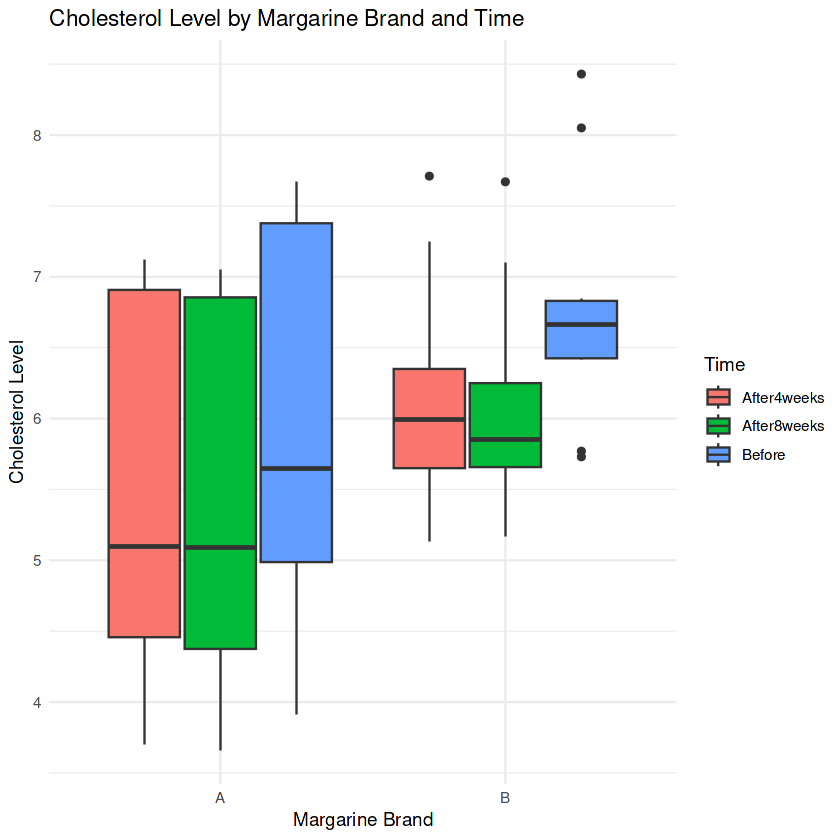

In [23]:
cholesterolDataSetLong <- cholesterol_df %>%
  pivot_longer(cols = Before:After8weeks,
               names_to = "Time",
               values_to = "Level")

ggplot(cholesterolDataSetLong, aes(x = Margarine, y = Level, fill = Time)) +
  geom_boxplot(position = position_dodge(width = 0.8)) + # Separate boxes for each time point
  theme_minimal() +
  labs(
    title = "Cholesterol Level by Margarine Brand and Time",
    x = "Margarine Brand",
    y = "Cholesterol Level"
  )

**Remark:** "As shown in the figure above, the data points for Brand B of margarine across the three time points have outliers. Therefore, we will be performing outlier treatment on the cholesterol levels of Margarine Brand B.

In [24]:
library(dplyr)

cholesterolDataSetLong <- cholesterolDataSetLong %>%
  group_by(Margarine, Time) %>%
  mutate(
    Q1 = quantile(Level, 0.25, na.rm = TRUE),
    Q3 = quantile(Level, 0.75, na.rm = TRUE),
    IQR = Q3 - Q1,
    lower_bound = Q1 - 1.5 * IQR,
    upper_bound = Q3 + 1.5 * IQR,
    Level = ifelse(Level < lower_bound, lower_bound, 
                   ifelse(Level > upper_bound, upper_bound, Level))
  ) %>%
  ungroup()
cholesterolDataSetLong

ID,Margarine,Time,Level,Q1,Q3,IQR,lower_bound,upper_bound
<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B,Before,6.42000,6.4250,6.8300,0.4050,5.81750,7.43750
1,B,After4weeks,5.83000,5.6500,6.3500,0.7000,4.60000,7.40000
1,B,After8weeks,5.75000,5.6575,6.2500,0.5925,4.76875,7.13875
2,B,Before,6.76000,6.4250,6.8300,0.4050,5.81750,7.43750
2,B,After4weeks,6.20000,5.6500,6.3500,0.7000,4.60000,7.40000
2,B,After8weeks,6.13000,5.6575,6.2500,0.5925,4.76875,7.13875
3,B,Before,6.56000,6.4250,6.8300,0.4050,5.81750,7.43750
3,B,After4weeks,5.83000,5.6500,6.3500,0.7000,4.60000,7.40000
3,B,After8weeks,5.71000,5.6575,6.2500,0.5925,4.76875,7.13875


**Remark:** The outliers have now been replaced with the nearest valid value (i.e., the lower or upper bound).

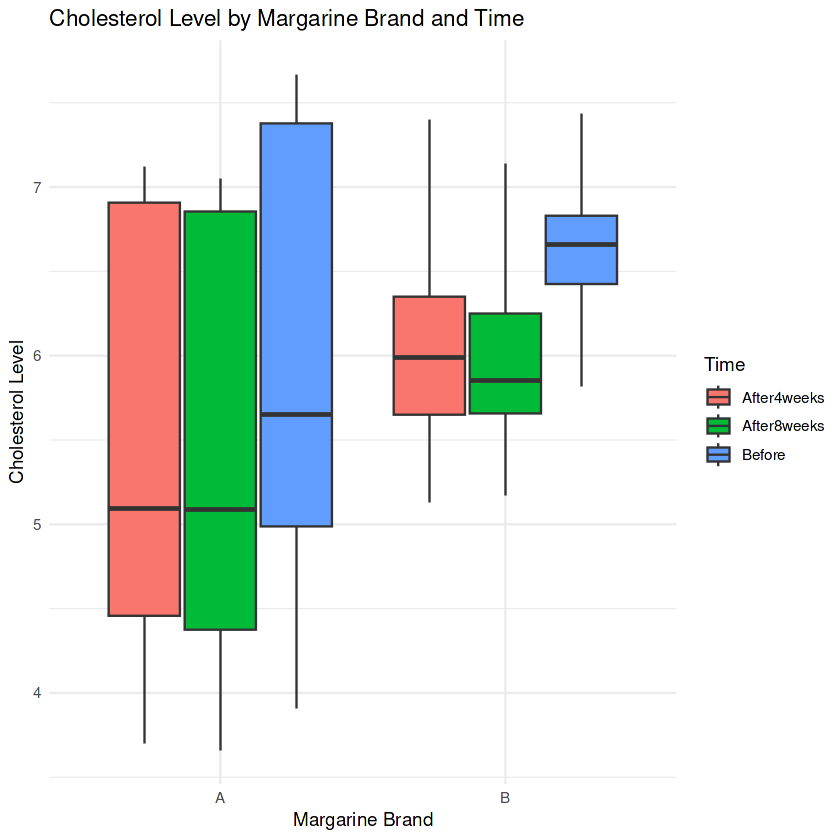

In [25]:
ggplot(cholesterolDataSetLong, aes(x = Margarine, y = Level, fill = Time)) +
  geom_boxplot(position = position_dodge(width = 0.8)) + # Separate boxes for each time point
  theme_minimal() +
  labs(
    title = "Cholesterol Level by Margarine Brand and Time",
    x = "Margarine Brand",
    y = "Cholesterol Level"
  )

**Remark:** As shown in the figure above, there are no more extreme outliers

In [26]:
cholesterolDataSetLong <- cholesterolDataSetLong %>%
  select(-Q1, -Q3,-IQR,-lower_bound,-upper_bound)
head(cholesterolDataSetLong)

ID,Margarine,Time,Level
<dbl>,<fct>,<chr>,<dbl>
1,B,Before,6.42
1,B,After4weeks,5.83
1,B,After8weeks,5.75
2,B,Before,6.76
2,B,After4weeks,6.20
2,B,After8weeks,6.13


**Remark:** Using Winsorization, there are no extreme outliers anymore.

**Assumption 5**: The dependent variable is approximately normally distributed for each cell of the design.

In [27]:
ShapiroWilkTest <- cholesterolDataSetLong %>%
  group_by(Margarine, Time) %>%
  summarise(
    shapiro_statistic = shapiro.test(Level)$statistic,
    shapiro_pValue = shapiro.test(Level)$p.value,
    .groups = "drop"
  )
ShapiroWilkTest

Margarine,Time,shapiro_statistic,shapiro_pValue
<fct>,<chr>,<dbl>,<dbl>
A,After4weeks,0.8710561,0.1543526
A,After8weeks,0.8763769,0.1738318
A,Before,0.9005331,0.2921657
B,After4weeks,0.9280857,0.4293297
B,After8weeks,0.9088528,0.2732039
B,Before,0.9196183,0.3537820


**Remark:** All covariances are sufficiently normally distributed.

**Assumption 6**: Homogeneity of variances for the between-subjects factor.

In [28]:
suppressMessages(library(car))

leveneTest(Level ~ Margarine, data = cholesterolDataSetLong)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,18.60862,7.194774e-05
,52,NA,NA


**Remark:**Based on the given p-value being less than 0.05, the test for homogeneity of the between-subjects factor is violated. Therefore, we are unable to perform the statistical analysis. Since one of the assumptions of ANOVA is violated, we will perform hypothesis testing using a non-parametric test. We will use the Kruskal-Wallis Test for comparing the between-subjects variables, and the Friedman Test for repeated measurements/within-subjects variables.oints.


**Hypotheses:**

* Null Hypothesis ($H_0$): There is no significant difference in the cholesterol levels between the two brands of margarine over the three time points.
* Alternative Hypothesis ($H_1$): There is a significant difference in the cholesterol levels between the two brands of margarine over the three time points.

## Descriptive Statistics

In [29]:
margarineSummary <- cholesterolDataSetLong %>%
  group_by(Margarine) %>%
  summarise(
    Mean = mean(Level, na.rm = TRUE),
    SD = sd(Level, na.rm = TRUE),
    Median = median(Level, na.rm = TRUE),
    Min = min(Level, na.rm = TRUE),
    Max = max(Level, na.rm = TRUE),
    n = n()
  )
margarineSummary

Margarine,Mean,SD,Median,Min,Max,n
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
A,5.607500,1.3568770,5.320,3.66,7.6700,24
B,6.253958,0.6965044,6.175,5.13,7.4375,30


As shown in the table above, **Margarine Brand B has a slightly higher average cholesterol level** (6.25) compared to Margarine Brand A (5.61). Moreover, the **cholesterol levels for Margarine A have a wider spread**, as indicated by the higher standard deviation (1.36), suggesting **more variability among participants**. In contrast, **Margarine Brand B has a narrower range of cholesterol levels**, with a lower standard deviation (0.70), indicating **more consistency across participants**. Both margarine types have **similar maximum cholesterol levels**; however, the **minimum cholesterol level for Margarine B is higher than that for Margarine A**.

In [30]:
TimeSummary <- cholesterolDataSetLong %>%
  group_by(Time) %>%
  summarise(
    Mean = mean(Level, na.rm = TRUE),
    SD = sd(Level, na.rm = TRUE),
    Median = median(Level, na.rm = TRUE),
    Min = min(Level, na.rm = TRUE),
    Max = max(Level, na.rm = TRUE),
    n = n()
  ) %>%
  arrange(desc(Mean))
TimeSummary

Time,Mean,SD,Median,Min,Max,n
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Before,6.326111,1.061707,6.50,3.91,7.67000,18
After4weeks,5.824444,1.095043,5.83,3.70,7.40000,18
After8weeks,5.749375,1.054370,5.73,3.66,7.13875,18


As shown in the table above, **cholesterol levels appear to decrease over time**, from an average of 6.33 mg/dL before consumption to 5.82 mg/dL after 4 weeks, and 5.75 mg/dL after 8 weeks. Also, the standard deviations are fairly similar across all time points, indicating similar variability in cholesterol levels at each time point. In the case of median, the values are very close to the means, suggesting that the distributions of cholesterol levels are fairly symmetric and not highly skewed. Lastly, the minimum and maximum values show a similar range across all time points, but there is a slight decrease in the range of cholesterol levels from the "Before" to the "After 8 weeks" period.

In [31]:
cholesterolDataSetLong$Margarine <- as.factor(cholesterolDataSetLong$Margarine)
cholesterolDataSetLong$Time <- as.factor(cholesterolDataSetLong$Time)

library(ARTool)
art_model <- art(Level ~ Margarine * Time + (1 | ID), data = cholesterolDataSetLong)

anova(art_model)

,Term,F,Df,Df.res,Pr(>F)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Margarine,Margarine,1.260876,1,16,2.780529e-01
Time,Time,52.199083,2,32,8.422928e-11
Margarine:Time,Margarine:Time,1.485724,2,32,2.415359e-01


### **Key Findings**
#### **1. Main Effect of Margarine**
* **F-Statistic:** 1.26
* **Degrees of Freedom (Df):** 1 (for Margarine) and 16 (residuals)
* **p-value:** 0.278

The p-value for Margarine is 0.278, which is greater than the significance threshold of 0.05. This suggests that there is **no significant effect of margarine brand (A vs B) on cholesterol levels**. In other words, Margarine alone does not appear to have a statistically significant influence on cholesterol levels at the 5% significance level.

#### **2. Main Effect of Time**
* **F-Statistic:** 52.20
* **Degrees of Freedom (Df):** 2 (for Time) and 32 (residuals)
* **p-value:** 8.34 x 10$^{-11}$

The p-value for Time is extremely small (p < 0.05), indicating **a significant effect of time on cholesterol levels**. This suggests that cholesterol levels do change over the different time points (before, after 4 weeks, and after 8 weeks of consumption). The F-statistic of 52.20 indicates a large effect, reinforcing the conclusion that time plays a significant role in explaining changes in cholesterol levels.

#### **3. Interaction Effect Between Margarine and Time**
* **F-Statistic:** 1.49
* **Degrees of Freedom (Df):** 2 (for Margarine:Time) and 32 (residuals)
* **p-value:** 0.242

The p-value for the Margarine:Time interaction is 0.242, which is greater than 0.05. This suggests that there is **no significant interaction effect between margarine type and time on cholesterol levels**. In other words, the effect of margarine type on cholesterol levels is not significantly different across the different time points.

## Conclusion
The results suggest that while time has a significant effect on cholesterol levels, the type of margarine consumed (Brand A vs. Brand B) does not significantly influence cholesterol levels. Furthermore, there is no evidence of an interaction between margarine type and time, meaning that changes in cholesterol levels over time are similar regardless of the margarine brand consumed.
## Implications
* The significant main effect of time indicates that cholesterol levels naturally change over the duration of the study, which may be due to external factors or the effect of margarine consumption over time.
* The lack of significant differences between margarine brands suggests that both brands have a similar impact on cholesterol levels.
* Future studies might explore other factors influencing cholesterol levels over time or test additional margarine types to confirm these findings.